In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns

In [3]:
import os
import sys

In [4]:
# chaging directory

In [5]:
root, *_ = !pwd

In [6]:
if root.endswith('notebooks'):
    os.chdir('../')
    root, *_ = !pwd
    sys.path.append('src/')

In [7]:
os.getcwd()

'/home/med/projects/competitions/mlb-kaggle'

In [8]:
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
RAW_PATH = Path(os.environ['RAW_PATH'])

In [10]:
os.listdir(RAW_PATH)

['seasons.csv',
 'teams.csv',
 'example_sample_submission.csv',
 'train.csv',
 'mlb-player-digital-engagement-forecasting.zip',
 'awards.csv',
 'players.csv',
 'example_test.csv',
 'mlb']

In [11]:
train_data = pd.read_csv(RAW_PATH / 'train.csv', parse_dates=['date'])
train_data = train_data.set_index('date')

In [12]:
train_data.head()

,nextDayPlayerEngagement,games,rosters,playerBoxScores,teamBoxScores,transactions,standings,awards,events,playerTwitterFollowers,teamTwitterFollowers
date,,,,,,,,,,,
2018-01-01,"[{""engagementMetricsDate"":""2018-01-02"",""player...",NaN,"[{""playerId"":400121,""gameDate"":""2018-01-01"",""t...",NaN,NaN,"[{""transactionId"":340732,""playerId"":547348,""pl...",NaN,NaN,NaN,"[{""date"":""2018-01-01"",""playerId"":545361,""playe...","[{""date"":""2018-01-01"",""teamId"":147,""teamName"":..."
2018-01-02,"[{""engagementMetricsDate"":""2018-01-03"",""player...",NaN,"[{""playerId"":134181,""gameDate"":""2018-01-02"",""t...",NaN,NaN,"[{""transactionId"":339458,""playerId"":621173,""pl...",NaN,NaN,NaN,NaN,NaN
2018-01-03,"[{""engagementMetricsDate"":""2018-01-04"",""player...",NaN,"[{""playerId"":425492,""gameDate"":""2018-01-03"",""t...",NaN,NaN,"[{""transactionId"":347527,""playerId"":572389,""pl...",NaN,NaN,NaN,NaN,NaN
2018-01-04,"[{""engagementMetricsDate"":""2018-01-05"",""player...",NaN,"[{""playerId"":282332,""gameDate"":""2018-01-04"",""t...",NaN,NaN,"[{""transactionId"":339549,""playerId"":545343,""pl...",NaN,NaN,NaN,NaN,NaN
2018-01-05,"[{""engagementMetricsDate"":""2018-01-06"",""player...",NaN,"[{""playerId"":282332,""gameDate"":""2018-01-05"",""t...",NaN,NaN,"[{""transactionId"":341195,""playerId"":628336,""pl...",NaN,NaN,NaN,NaN,NaN


### time and player data 

In [14]:
_players = pd.read_csv(RAW_PATH / 'players.csv')

In [15]:
_players['playerForTestSetAndFuturePreds'].fillna(False, inplace=True)

In [16]:
player_in_test = _players.query('playerForTestSetAndFuturePreds')['playerId']

### target 

In [17]:
from data.ingest_data import ingest_target, ingest_features
from data.util import filter_by_date, filter_by_id

In [18]:
%time target = ingest_target(train_data)

preprocessing target
CPU times: user 38.4 s, sys: 643 ms, total: 39.1 s
Wall time: 39 s


In [19]:
target.head()

,playerId,target1,target2,target3,target4,date,target_avg
0,112526,0.055277,5.496109,0.025839,16.176471,2018-01-01,5.438424
1,112526,0.060625,3.252914,0.030486,8.541353,2018-01-02,2.971345
2,112526,0.029341,1.648352,0.032613,10.490112,2018-01-03,3.050104
3,112526,0.014799,2.665894,0.087422,19.091467,2018-01-04,5.464896
4,112526,0.083916,1.161002,0.024759,6.643880,2018-01-05,1.978389


In [20]:
df = target.copy()

In [21]:
df = filter_by_id(df, player_in_test)

In [22]:
playerList = df.groupby(['playerId'])['target_avg'].std().sort_values(ascending=False).reset_index()

In [23]:
playerList

,playerId,target_avg
0,547180,18.775985
1,660271,18.055585
2,545361,17.410036
3,605141,17.236386
4,592450,16.850044
...,...,...
1182,593590,0.119988
1183,656458,0.115664
1184,676424,0.094298
1185,641927,0.086976


In [24]:
# df = filter_by_id(df, playerList['playerId'].head(50))

In [25]:
df.playerId.nunique()

1187

In [26]:
# player stats

In [27]:

train_data.columns

Index(['nextDayPlayerEngagement', 'games', 'rosters', 'playerBoxScores',
       'teamBoxScores', 'transactions', 'standings', 'awards', 'events',
       'playerTwitterFollowers', 'teamTwitterFollowers'],
      dtype='object')

In [28]:
df = ingest_features(df, train_data)

In [29]:
df.head()

,playerId,target1,target2,target3,target4,date,target_avg,battingOrder,gamesPlayedBatting,flyOuts,...,assists,putOuts,errors,chances,rosterDate,teamId,status,numberOfFollowers,awardId,teamFollowers
0,405395,0.151872,21.449416,0.112952,22.990196,2018-01-01,11.176109,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-01,108.0,Active,196335.0,NaN,957451.0
1,405395,0.136406,10.978585,0.096403,15.669173,2018-01-02,6.720142,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-02,108.0,Active,NaN,NaN,NaN
2,405395,0.064460,9.226190,0.101464,23.172829,2018-01-03,8.141236,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-03,108.0,Active,NaN,NaN,NaN
3,405395,0.024217,10.170965,0.102448,35.359116,2018-01-04,11.414186,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-04,108.0,Active,NaN,NaN,NaN
4,405395,0.157556,4.294307,0.046517,12.347789,2018-01-05,4.211542,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-05,108.0,Active,NaN,NaN,NaN


### preprocessing 

In [30]:
from typing import List
def forward_fill(df: pd.DataFrame, features: List[str],
                 on='playerId',
                 limit: int =None):
    ffilled_df = df.groupby(on)[features].ffill(limit=limit)
    df.loc[:, features] = ffilled_df
    return df

In [31]:
def gen_hardcoded_features(df: pd.DataFrame):
    # some feature eng for the dates
    df['playerAge'] = (df['date'] - df['DOB']).dt.total_seconds()
    df['playerTSinceDebut'] = (df['date'] - df['mlbDebutDate']).dt.total_seconds()
    df['playerDebutAge'] = (df['mlbDebutDate'] - df['DOB']).dt.total_seconds()
    df['rostersTime'] = (df['date'] - pd.to_datetime(df['rosterDate'])).dt.total_seconds()
    df['rostersTime'] /= 60 * 60 * 24
    # normalize
    df[['playerAge', 'playerTSinceDebut', 'playerDebutAge']] /= 60 * 60 * 24 * 365
    df['AwardWinner'] = df['awardId'].isna().astype(np.float32)
    return df

In [32]:
def fillna(df: pd.DataFrame, fill_value=-1):
    return df.fillna(-1)

In [33]:
from pipeline.core import FunctionTransformer, Pipeline, PdColumnTransformer, PdFeatureUnion
from pipeline.continuous import PdScaleNorm, FilterContinuousFeatures, MedianFillNaN
from pipeline.stats import StatisticGen, LagGen
from pipeline.categories import Categorify
from pipeline.season import join_season_info
from pipeline.players import join_players_info

In [34]:
# transformer for joining data and create base features
fill_forward_tmf = FunctionTransformer(forward_fill, kw_args={'features':['numberOfFollowers',
                                                                        'teamFollowers',
                                                                        'status',
                                                                        'teamId', 'rosterDate']})
join_season_tmf = FunctionTransformer(join_season_info,
                                      kw_args={'path_to_season': RAW_PATH / 'seasons.csv',
                                             'date_attr': ['year', 'month']})
join_players_tmf = FunctionTransformer(join_players_info, kw_args={'path_to_players': RAW_PATH / 'players.csv'})
harcoded_feat_tmf = FunctionTransformer(gen_hardcoded_features)

In [35]:
# creating pipeline
join_and_compute_feat_pl = Pipeline([('season', join_season_tmf),
                                     ('players', join_players_tmf),
                                     ('fill_forward', fill_forward_tmf),
                                     ('hardcoded_feat', harcoded_feat_tmf)])

In [36]:
# features to use for target preprocessing
target_cols = ['target1', 'target2', 'target3', 'target4']
index_cols = ['date', 'playerId']
pp_cols = target_cols + index_cols

In [38]:
# categories encoding
categories = ['playerId', 'seasonPart', 'year',
              'primaryPositionName', 'month', 'status', 'teamId', 'awardId']

categories_tmf = PdColumnTransformer([(category, Categorify(add_nan=True), category)
                                       for category in categories])

In [39]:
# target statistics

stats_gen_tmf = StatisticGen(stats=['mean', 'median', 'std'], windows=[90], drop_index=True)
stats_lagger_tmf = LagGen(lags=[60], drop_index=False)

# create mean and median stats after lagging the target 1 day
stats_lagger_tmf = Pipeline([('lags', stats_lagger_tmf),
                             ('stats', stats_gen_tmf),
#                              ('fillnan', FunctionTransformer(fillna)),
#                              ('normalize', PdScaleNorm())
                            ])


target_stats_tmf = PdColumnTransformer([
    ('lags_stats', stats_lagger_tmf, pp_cols),
                                  ])

In [40]:
# continuous preprocessing

median_fillnan_columns = ['numberOfFollowers', 'teamFollowers',
                          'playerDebutAge', 'playerAge', 'playerTSinceDebut']
fillnan_median_tmf = MedianFillNaN(median_fillnan_columns)

# get the rest of the continuous features
continuous_feat_tmf = Pipeline([('get_cont_feat', FilterContinuousFeatures()),
                                ('fillnan_median', fillnan_median_tmf),
                                ('fillnan', FunctionTransformer(fillna)),
                                ('normalize', PdScaleNorm())
                               ])

In [41]:
# putting all together
all_features_tmf = PdFeatureUnion([('target_stats', target_stats_tmf), 
                                   ('cont_feat', continuous_feat_tmf), 
                                  ('cats', categories_tmf)
                                  ])

In [42]:
# main pipeline with all steps 
pipeline = Pipeline([('join_compute', join_and_compute_feat_pl),
                    ('features_gen', all_features_tmf)])

In [43]:
pipeline

Pipeline(steps=[('join_compute',
                 Pipeline(steps=[('season',
                                  FunctionTransformer(func=<function join_season_info at 0x7fd0f0f86e50>,
                                                      kw_args={'date_attr': ['year',
                                                                             'month'],
                                                               'path_to_season': PosixPath('data/raw/seasons.csv')})),
                                 ('players',
                                  FunctionTransformer(func=<function join_players_info at 0x7fd0f0f86f70>,
                                                      kw_args={'path_to_players': PosixPath('data/raw/playe...
                                                                                     ('seasonPart',
                                                                                      Categorify(add_nan=True),
                                                   

In [44]:
from data.split import SplitData

In [45]:
sp = SplitData("2021-03-01", test_days=61)

In [46]:
train_idx = sp.train_idx(df)
valid_idx = sp.valid_idx(df)

In [47]:
%%time
pipeline.fit(sp.filter(df, train_idx))

CPU times: user 18 s, sys: 10.2 s, total: 28.2 s
Wall time: 28.4 s


Pipeline(steps=[('join_compute',
                 Pipeline(steps=[('season',
                                  FunctionTransformer(func=<function join_season_info at 0x7fd0f0f86e50>,
                                                      kw_args={'date_attr': ['year',
                                                                             'month'],
                                                               'path_to_season': PosixPath('data/raw/seasons.csv')})),
                                 ('players',
                                  FunctionTransformer(func=<function join_players_info at 0x7fd0f0f86f70>,
                                                      kw_args={'path_to_players': PosixPath('data/raw/playe...
                                                                                     ('seasonPart',
                                                                                      Categorify(add_nan=True),
                                                   

In [48]:
%%time
features = pipeline.transform(df)

CPU times: user 17.6 s, sys: 3.45 s, total: 21.1 s
Wall time: 21.2 s


In [49]:
pd.options.display.max_rows = 100
features.T.head(100)

,0,1,2,3,4,5,6,7,8,9,...,1443445,1443446,1443447,1443448,1443449,1443450,1443451,1443452,1443453,1443454
target1__60lag__mean__90d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013912
target1__60lag__median__90d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
target1__60lag__std__90d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131984
target2__60lag__mean__90d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.445051,2.530756,2.580583,2.659379,2.743894,2.793519,2.852765,2.875587,2.965806,3.442276
target2__60lag__median__90d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.716543,0.760957,0.823073,0.934698,1.013046,1.025530,1.034818,1.040071,1.056387,1.082565
target2__60lag__std__90d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.229539,7.245929,7.243749,7.253926,7.273668,7.269972,7.268677,7.262842,7.277138,8.398266
target3__60lag__mean__90d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.153315,0.166825,0.174282,0.176357,0.177019,0.177850,0.178418,0.179435,0.179584,0.217882
target3__60lag__median__90d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
target3__60lag__std__90d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.797786,0.805419,0.806962,0.806749,0.806627,0.806481,0.806373,0.806203,0.806171,0.876362
target4__60lag__mean__90d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.515454,1.514864,1.517962,1.505702,1.484562,1.492430,1.494894,1.493768,1.493599,1.511075


In [50]:
continuous_feat = features.columns.drop(categories)

In [51]:
df[target_cols] = df[target_cols].astype(np.float32)

In [52]:
train_data = sp.filter(features, train_idx)
raw_train_df = sp.filter(df, train_idx)

In [53]:
valid_data = sp.filter(features, valid_idx)
raw_valid_df = sp.filter(df, valid_idx)

In [54]:
train_data.shape, raw_valid_df.shape

((1371048, 102), (72407, 86))

In [55]:
valid_data.shape, raw_train_df.shape

((72407, 102), (1371048, 86))

In [56]:
train_data[target_cols + ['date']] = raw_train_df[target_cols + ['date']]
valid_data[target_cols + ['date']] = raw_valid_df[target_cols + ['date']]

### modeling 

In [57]:
features_list = list(continuous_feat) + categories

In [58]:
features_list

['target1__60lag__mean__90d',
 'target1__60lag__median__90d',
 'target1__60lag__std__90d',
 'target2__60lag__mean__90d',
 'target2__60lag__median__90d',
 'target2__60lag__std__90d',
 'target3__60lag__mean__90d',
 'target3__60lag__median__90d',
 'target3__60lag__std__90d',
 'target4__60lag__mean__90d',
 'target4__60lag__median__90d',
 'target4__60lag__std__90d',
 'battingOrder',
 'gamesPlayedBatting',
 'flyOuts',
 'groundOuts',
 'runsScored',
 'doubles',
 'triples',
 'homeRuns',
 'strikeOuts',
 'baseOnBalls',
 'intentionalWalks',
 'hits',
 'hitByPitch',
 'atBats',
 'caughtStealing',
 'stolenBases',
 'groundIntoDoublePlay',
 'groundIntoTriplePlay',
 'plateAppearances',
 'totalBases',
 'rbi',
 'leftOnBase',
 'sacBunts',
 'sacFlies',
 'catchersInterference',
 'pickoffs',
 'gamesPlayedPitching',
 'gamesStartedPitching',
 'completeGamesPitching',
 'shutoutsPitching',
 'winsPitching',
 'lossesPitching',
 'flyOutsPitching',
 'airOutsPitching',
 'groundOutsPitching',
 'runsPitching',
 'doublesP

In [59]:
from omegaconf import OmegaConf

parameters = {
 'objective':'mae',
 'reg_alpha': 0.1,
 'reg_lambda': 0.1, 
 'n_estimators': 100000,
 'learning_rate': 0.1,
 'random_state': 42,
}
config = {'hp': parameters,
          'features': features_list,
          'categories': categories,
          'target_cols': target_cols}
config = OmegaConf.create(config)

In [60]:
config

{'hp': {'objective': 'mae', 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'n_estimators': 100000, 'learning_rate': 0.1, 'random_state': 42}, 'features': ['target1__60lag__mean__90d', 'target1__60lag__median__90d', 'target1__60lag__std__90d', 'target2__60lag__mean__90d', 'target2__60lag__median__90d', 'target2__60lag__std__90d', 'target3__60lag__mean__90d', 'target3__60lag__median__90d', 'target3__60lag__std__90d', 'target4__60lag__mean__90d', 'target4__60lag__median__90d', 'target4__60lag__std__90d', 'battingOrder', 'gamesPlayedBatting', 'flyOuts', 'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns', 'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch', 'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay', 'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi', 'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference', 'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching', 'completeGamesPitching', 'shutoutsPitching', 'winsPitching', 'losses

In [61]:
from train.lgbm import run_lgbm

In [62]:
lgbm_output = run_lgbm(config, train_data, valid_data)

target1


/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['awardId', 'month', 'playerId', 'primaryPositionName', 'seasonPart', 'status', 'teamId', 'year']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1.38985
[200]	valid_0's l1: 1.38424
[300]	valid_0's l1: 1.38287
[400]	valid_0's l1: 1.38165
[500]	valid_0's l1: 1.3811
[600]	valid_0's l1: 1.37955
[700]	valid_0's l1: 1.37853
[800]	valid_0's l1: 1.37805
[900]	valid_0's l1: 1.37713
[1000]	valid_0's l1: 1.37652
[1100]	valid_0's l1: 1.37613
[1200]	valid_0's l1: 1.37606
[1300]	valid_0's l1: 1.37583
[1400]	valid_0's l1: 1.37513
[1500]	valid_0's l1: 1.3747
[1600]	valid_0's l1: 1.3747
[1700]	valid_0's l1: 1.37474
Early stopping, best iteration is:
[1606]	valid_0's l1: 1.3747
target2
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 2.98699
[200]	valid_0's l1: 2.97713
[300]	valid_0's l1: 2.9749
Early stopping, best iteration is:
[263]	valid_0's l1: 2.97394
target3
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1.23466
[200]	valid_0's l1: 1.23464
Early stopping, best iteration is:
[161]	valid_0's l

In [63]:
from train.core import predict_recursive, Ensemble

In [64]:
ensemble = Ensemble(models=[lgbm_output], pipeline=pipeline)

In [65]:
%%time
raw_train_fr = raw_train_df.query("date >= '2020-07-01'").reset_index(drop=True)
raw_train_fr = raw_train_fr[df.columns]

recursive_prediction = []
for date, val_date_df in raw_valid_df.groupby('date'):
    val_date_df = val_date_df[df.columns].reset_index(drop=True)
    _recurive_pred, raw_train_fr = predict_recursive(val_date_df,
                                                     raw_train_fr,
                                                     ensemble,
                                                     n_days=150+60+10,
                                                     target_cols=target_cols)
    recursive_prediction.append(_recurive_pred)

recursive_prediction = pd.concat(recursive_prediction, ignore_index=True)
recursive_prediction.sort_values(['playerId', 'date'], inplace=True)
recursive_prediction.reset_index(drop=True, inplace=True)
recursive_prediction.rename(columns={f: f.replace('target', 'yhat')
                                     for f in target_cols}, inplace=True)
recursive_prediction[target_cols] = raw_valid_df[target_cols].to_numpy()

    target1    target2   target3    target4       date  playerId
0  0.472854  18.389011  0.388302  14.862667 2021-03-01    405395
1  0.231291  16.260479  0.348468   8.649069 2021-03-01    408234
2  0.014642   1.715686  0.021096   1.082248 2021-03-01    424144
3  0.025162   2.004019  0.012687   0.674704 2021-03-01    425772
4  0.000457   0.958808  0.000954   0.454344 2021-03-01    425784
    target1    target2   target3    target4       date  playerId
0  0.472854  18.389011  0.388302  14.862667 2021-03-02    405395
1  0.231291  16.260479  0.348468   8.649069 2021-03-02    408234
2  0.014642   1.715686  0.021096   1.036158 2021-03-02    424144
3  0.025162   2.004019  0.012687   0.674704 2021-03-02    425772
4  0.000457   0.958808  0.000954   0.454344 2021-03-02    425784
    target1    target2   target3    target4       date  playerId
0  0.472855  18.388875  0.388302  14.862667 2021-03-03    405395
1  0.231291  16.260479  0.348468   8.649069 2021-03-03    408234
2  0.014642   1.738700  0

    target1    target2   target3    target4       date  playerId
0  0.467701  18.388875  0.386215  15.822406 2021-03-23    405395
1  0.231295  16.845057  0.348468   8.649069 2021-03-23    408234
2  0.019943   1.953897  0.018556   1.121058 2021-03-23    424144
3  0.022409   1.699119  0.010747   0.666154 2021-03-23    425772
4  0.000956   1.028358  0.000954   0.455527 2021-03-23    425784
    target1    target2   target3    target4       date  playerId
0  0.467701  18.388875  0.386215  15.822406 2021-03-24    405395
1  0.231295  16.845057  0.348468   8.649069 2021-03-24    408234
2  0.019831   1.953897  0.018556   1.121058 2021-03-24    424144
3  0.022409   1.699119  0.010747   0.666154 2021-03-24    425772
4  0.000956   1.028358  0.000954   0.455527 2021-03-24    425784
    target1    target2   target3    target4       date  playerId
0  0.467701  18.388875  0.386215  15.822406 2021-03-25    405395
1  0.231295  16.845550  0.348468   8.649069 2021-03-25    408234
2  0.019831   2.296275  0

    target1    target2   target3    target4       date  playerId
0  0.729705  16.389048  0.398047  18.296400 2021-04-14    405395
1  0.035869   4.873883  0.343154   9.149756 2021-04-14    408234
2  0.004779   1.344463  0.015427   0.890922 2021-04-14    424144
3  0.003318  -0.014871  0.002118   0.360246 2021-04-14    425772
4  0.000503  -0.030605  0.000786   0.169945 2021-04-14    425784
    target1    target2   target3    target4       date  playerId
0  0.406356  14.964532  0.399736  16.016291 2021-04-15    405395
1  0.035869   4.873883  0.343154   9.149756 2021-04-15    408234
2  0.004852   1.047279  0.015427   0.830912 2021-04-15    424144
3  0.003318  -0.014871  0.002118   0.360246 2021-04-15    425772
4  0.000475  -0.030605  0.000786   0.169945 2021-04-15    425784
    target1    target2   target3    target4       date  playerId
0  0.800009  16.294496  0.400668  18.303641 2021-04-16    405395
1  0.035869   4.766870  0.343154   9.149756 2021-04-16    408234
2  0.004779   1.331634  0

In [66]:
from evaluate.metrics import compute_metrics

with best 500 ids 
one day lag

{'mae_mean': 15.404842,
 'mae_1': 15.112363,
 'mae_2': 12.518346,
 'mae_3': 15.941521,
 'mae_4': 18.04714}
 
{'mae_mean': 16.107979,
 'mae_1': 14.4299965,
 'mae_2': 13.712786,
 'mae_3': 17.216927,
 'mae_4': 19.072205}
 
lag 60 day 150 stats mean median std
raw_valid_df

{'mae_mean': 16.526415,
 'mae_1': 15.134252,
 'mae_2': 15.736391,
 'mae_3': 16.731949,
 'mae_4': 18.503065}
 
{'mae_mean': 16.243195,
 'mae_1': 14.64544,
 'mae_2': 15.223519,
 'mae_3': 16.67205,
 'mae_4': 18.43177}
 
 
with best 500 ids 
one day lag 
{'mae_mean': 2.4375365,
 'mae_1': 2.2795138,
 'mae_2': 3.1164076,
 'mae_3': 1.6708878,
 'mae_4': 2.6833365}
 
{'mae_mean': 3.2938020082107333,
 'mae_1': 2.5740078375938165,
 'mae_2': 5.631358953836824,
 'mae_3': 1.837284798457624,
 'mae_4': 3.1325564429546677}
 
lag 60 day 150 stats mean median std

{'mae_mean': 2.8213322,
 'mae_1': 2.4738746,
 'mae_2': 3.9536836,
 'mae_3': 1.8413752,
 'mae_4': 3.0163958}
 
{'mae_mean': 2.8054446768310446,
 'mae_1': 2.4669433853402922,
 'mae_2': 3.901420425393473,
 'mae_3': 1.8396196560640896,
 'mae_4': 3.0137952405263246}
 
 con toda la data
 
 {'mae_mean': 1.5619345,
 'mae_1': 1.2107118,
 'mae_2': 2.4501314,
 'mae_3': 0.95569867,
 'mae_4': 1.6311963}
 
 
 {'mae_mean': 1.5390999144452775,
 'mae_1': 1.210369386168515,
 'mae_2': 2.3818660584590656,
 'mae_3': 0.9496059085908733,
 'mae_4': 1.6145583045626561}
 

no propating forward
{'mae_mean': 1.6181669660843265,
 'mae_1': 1.2681040951665854,
 'mae_2': 2.542929024032986,
 'mae_3': 0.9624048148661487,
 'mae_4': 1.699229930271586}

In [80]:
valid_test_prediction = pd.DataFrame(lgbm_output.prediction, columns=['yhat1', 'yhat2', 'yhat3', 'yhat4'])

valid_test_prediction[pp_cols] = raw_valid_df[pp_cols]

In [81]:
is_test_pred = valid_test_prediction['date'] >= '2021-04-01'

valid_prediction, test_prediction = (valid_test_prediction.loc[~is_test_pred, :],
                                     valid_test_prediction.loc[is_test_pred, :])

In [82]:
valid_rc_prediction, test_rc_prediction = (recursive_prediction.loc[~is_test_pred, :],
                                           recursive_prediction.loc[is_test_pred, :])

In [83]:
compute_metrics(valid_rc_prediction)

{'mae_mean': 2.1280272368735735,
 'mae_1': 1.5185806945268687,
 'mae_2': 3.5523600454067186,
 'mae_3': 1.498929114544973,
 'mae_4': 1.9422390930157332}

In [84]:
compute_metrics(test_rc_prediction)

{'mae_mean': 1.5524814471398094,
 'mae_1': 1.2258929135122025,
 'mae_2': 2.376827773148891,
 'mae_3': 0.9605127212743831,
 'mae_4': 1.646692380623761}

In [85]:
compute_metrics(valid_test_prediction)

{'mae_mean': 1.8445204738356797,
 'mae_1': 1.3747009914546477,
 'mae_2': 2.973944855623792,
 'mae_3': 1.2340979389862625,
 'mae_4': 1.7953381092780165}

{'mae_mean': 8.744398122453422,
 'mae_1': 8.91478917325309,
 'mae_2': 8.77152911391691,
 'mae_3': 7.268066076937021,
 'mae_4': 10.023208125706667}

{'mae_mean': 7.778629376660697,
 'mae_1': 7.032324510699994,
 'mae_2': 9.003801645329068,
 'mae_3': 6.445435023328167,
 'mae_4': 8.632956327285559}

{'mae_mean': 8.269542728999648,
 'mae_1': 7.989123162641596,
 'mae_2': 8.885384394035018,
 'mae_3': 6.863603225531401,
 'mae_4': 9.34006013379057}

In [76]:
def plot_pred(df, playerId, index=1):
    pdf = df.query(f'playerId == {playerId}')
    
    f, ax = plt.subplots(1, 1, figsize=(20, 5))
    
    tname = f'target{index}'
    yhat_name = f'yhat{index}'
    
    ax.plot('date', tname, '-o', data=pdf, label=tname)
    ax.plot('date', yhat_name, '-o', data=pdf, label=tname)
    
    ax.legend()
    

In [77]:
def feature_importance(features, model):
    fi = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    fi.sort_values(by='importance', ascending=False, inplace=True)
    return fi

def compute_fi(features, models):
    fi = [feature_importance(features, _model).assign(target=f'target{target}')
      for target, _model in enumerate(models)]
    fi = pd.concat(fi)
    fi = fi.pivot('feature', 'target', 'importance')
    fi = fi * 100 / fi.sum()
    fi['mean'] = fi.mean(axis=1)
    fi.sort_values(by='mean', ascending=False, inplace=True)
    return fi

In [78]:
fi = compute_fi(features_list, lgbm_output.model)

In [79]:
fi.head(100)

target,target0,target1,target2,target3,mean
feature,,,,,
playerId,59.082607,51.761724,61.511387,46.445890,54.700402
month,9.902449,10.557668,5.279503,10.636704,9.094081
playerTSinceDebut,5.377750,5.361217,4.265010,7.940075,5.736013
teamId,4.943960,1.774398,3.064182,3.999606,3.445537
year,1.865919,2.471483,6.811594,0.934358,3.020839
seasonPart,0.668327,6.425856,2.153209,1.604573,2.712991
target2__60lag__mean__90d,0.701536,4.081115,0.124224,4.348512,2.313847
target4__60lag__mean__90d,0.230386,0.811153,1.697723,3.938498,1.669440
target2__60lag__std__90d,1.108344,3.447402,0.186335,1.862803,1.651221


In [446]:
(recursive_prediction.groupby('playerId')
 .apply(lambda x: pd.Series(compute_metrics(x)))
 .sort_values(by='mae_mean', ascending=False)).head(10)

,mae_mean,mae_1,mae_2,mae_3,mae_4
playerId,,,,,
660271,30.075666,24.772224,39.755137,28.788179,26.987124
665487,20.120802,20.743209,10.026814,24.678510,25.034677
596019,16.968533,19.903620,13.485130,16.863942,17.621440
545361,16.303503,13.099639,15.417413,12.479415,24.217544
594798,15.732864,10.865039,21.214551,14.095020,16.756846
545333,14.252539,12.543905,15.121644,8.181842,21.162765
660670,14.129009,19.679952,13.084108,15.768960,7.983014
547180,12.635698,14.010436,7.972079,9.279919,19.280359
543037,12.493376,13.076903,14.578778,13.698363,8.619462


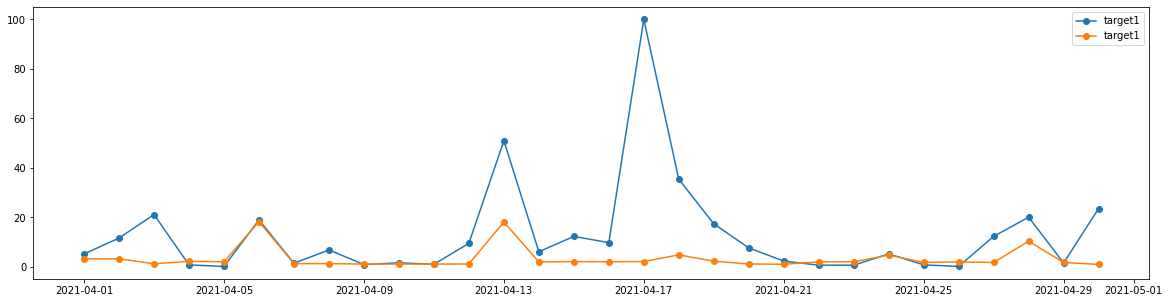

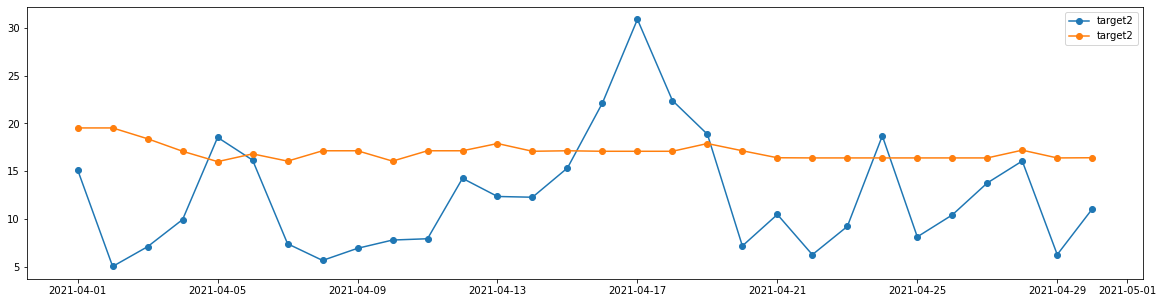

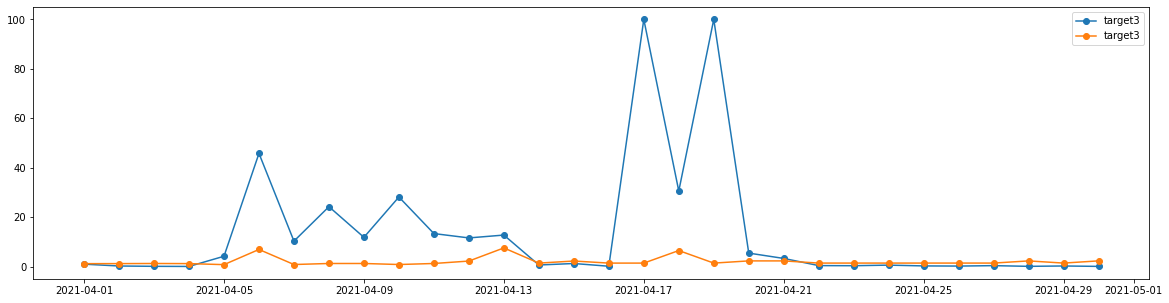

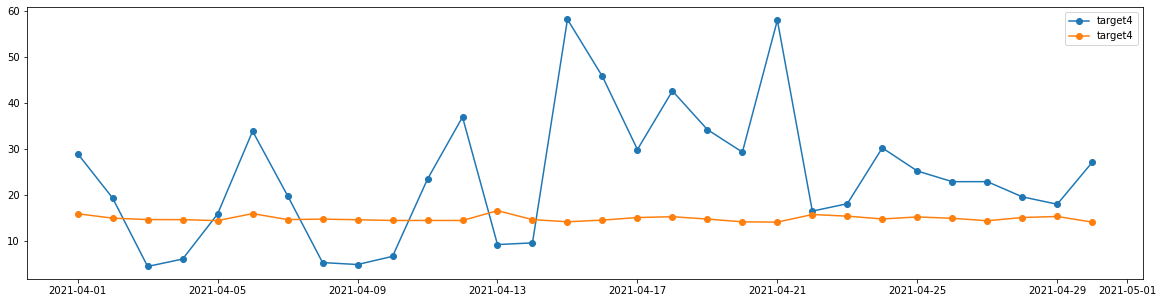

In [448]:
for index in range(1, 5):
    plot_pred(test_rc_prediction, playerId=605141, index=index)

In [75]:
# del train_data, valid_data, target, features #df, raw_train_df, raw_valid_df

In [76]:
# import gc
# gc.collect()